# Analyze Efficiency and accuracy  on Cluster



The chunks are all on the sample axis. The shape of the data coming into the PCA is `(n_sample, 132651)`.

Information about the nodes (hive) can be found here:

https://docs.pace.gatech.edu/hive/resources/


## Conclusions

???

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from toolz.curried import map as fmap
from toolz.curried import curry

# 8 core 

In [2]:
data = pd.read_csv("job5_c/pace-eightnode.csv",index_col=False)

In [3]:
data

,chunks,samples,fit_time,predict_time,r_squared
0,1,2000,228.001,45.968,0.993
1,1,4000,804.743,89.664,0.958
2,1,6000,1503.598,136.777,0.869
3,1,8000,2720.292,183.038,0.876
4,1,2000,228.657,45.721,0.993
...,...,...,...,...,...
67,48,8000,133.218,29.821,0.862
68,48,2000,30.789,9.012,0.994
69,48,4000,63.045,15.835,0.971
70,48,6000,97.616,25.163,0.935


In [4]:
data2000 = data.loc[data.samples == 2000].groupby('chunks').min()
data4000 = data.loc[data.samples == 4000].groupby('chunks').min()
data6000 = data.loc[data.samples == 6000].groupby('chunks').min()
data8000 = data.loc[data.samples == 8000].groupby('chunks').min()

In [5]:
data2000

,samples,fit_time,predict_time,r_squared
chunks,,,,
1,2000,228.001,45.721,0.993
2,2000,115.727,22.521,0.993
4,2000,61.592,11.542,0.994
8,2000,35.167,7.084,0.993
16,2000,31.200,7.781,0.994
24,2000,30.825,8.500,0.993
32,2000,30.742,8.228,0.994
40,2000,30.132,8.293,0.992
48,2000,29.872,8.621,0.994


In [6]:
data2000.index

Int64Index([1, 2, 4, 8, 16, 24, 32, 40, 48], dtype='int64', name='chunks')

In [7]:
data2000.iloc[:,1]

chunks
1     228.001
2     115.727
4      61.592
8      35.167
16     31.200
24     30.825
32     30.742
40     30.132
48     29.872
Name: fit_time, dtype: float64

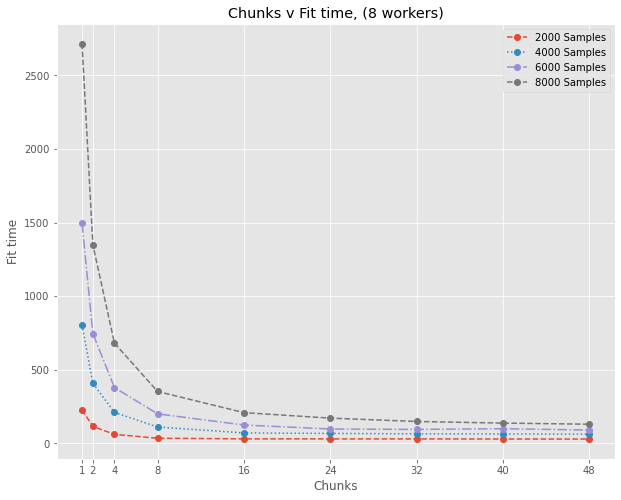

In [8]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000.index, data2000.iloc[:,1],'o--', label='2000 Samples')
plt.plot(data4000.index, data4000.iloc[:,1], 'o:', label='4000 Samples')
plt.plot(data6000.index, data6000.iloc[:,1], 'o-.', label='6000 Samples')
plt.plot(data8000.index, data8000.iloc[:,1], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v Fit time, (8 workers)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

# 16 Core

In [9]:
data_16 = pd.read_csv("job6_c/pace-sixteennode.csv",index_col=False)

data2000_16 = data_16.loc[data_16.samples == 2000].groupby('chunks').min()
data4000_16 = data_16.loc[data_16.samples == 4000].groupby('chunks').min()
data6000_16 = data_16.loc[data_16.samples == 6000].groupby('chunks').min()
data8000_16 = data_16.loc[data_16.samples == 8000].groupby('chunks').min()

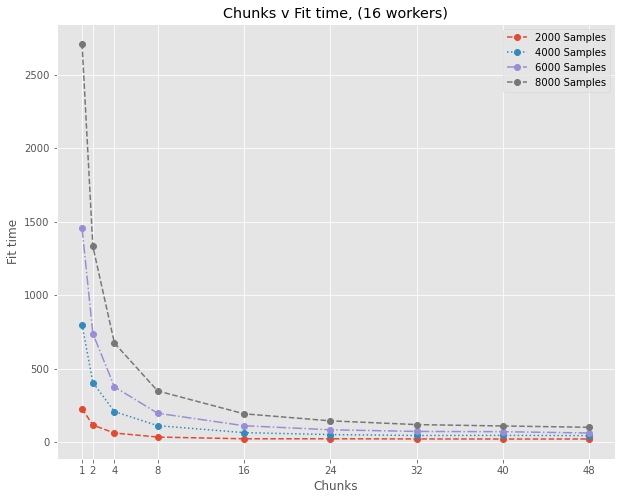

In [10]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000_16.index, data2000_16.iloc[:,1],'o--', label='2000 Samples')
plt.plot(data4000_16.index, data4000_16.iloc[:,1], 'o:', label='4000 Samples')
plt.plot(data6000_16.index, data6000_16.iloc[:,1], 'o-.', label='6000 Samples')
plt.plot(data8000_16.index, data8000_16.iloc[:,1], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v Fit time, (16 workers)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

# 24 Core

In [11]:
data_24 = pd.read_csv("job7_c/pace-twentyfournode.csv",index_col=False)

data2000_24 = data_24.loc[data_24.samples == 2000].groupby('chunks').min()
data4000_24 = data_24.loc[data_24.samples == 4000].groupby('chunks').min()
data6000_24 = data_24.loc[data_24.samples == 6000].groupby('chunks').min()
data8000_24 = data_24.loc[data_24.samples == 8000].groupby('chunks').min()

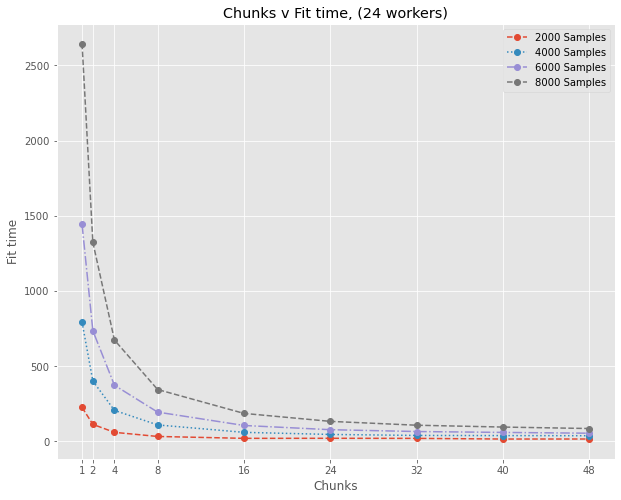

In [12]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000_24.index, data2000_24.iloc[:,1],'o--', label='2000 Samples')
plt.plot(data4000_24.index, data4000_24.iloc[:,1], 'o:', label='4000 Samples')
plt.plot(data6000_24.index, data6000_24.iloc[:,1], 'o-.', label='6000 Samples')
plt.plot(data8000_24.index, data8000_24.iloc[:,1], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v Fit time, (24 workers)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

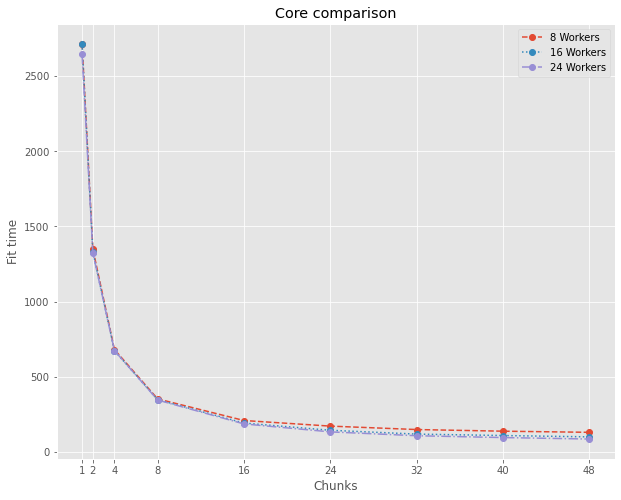

In [13]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data8000.index, data8000.iloc[:,1],'o--', label='8 Workers')
plt.plot(data8000_16.index, data8000_16.iloc[:,1], 'o:', label='16 Workers')
plt.plot(data8000_24.index, data8000_24.iloc[:,1], 'o-.', label='24 Workers')
plt.xticks(data2000.index)
plt.title('Core comparison')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

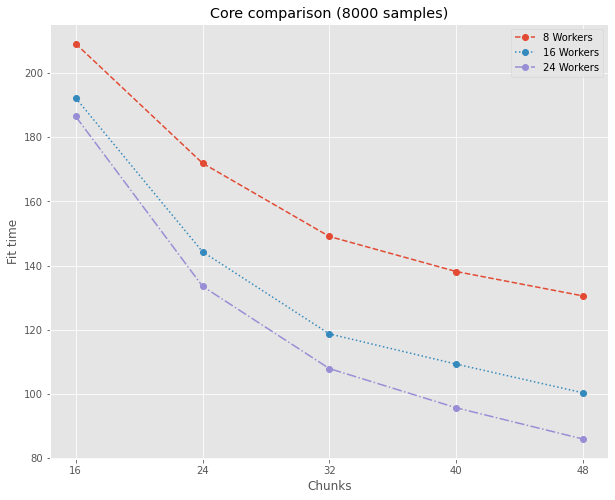

In [14]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data8000.index[4:], data8000.iloc[4:,1],'o--', label='8 Workers')
plt.plot(data8000_16.index[4:], data8000_16.iloc[4:,1], 'o:', label='16 Workers')
plt.plot(data8000_24.index[4:], data8000_24.iloc[4:,1], 'o-.', label='24 Workers')
plt.xticks(data2000.index[4:])
plt.title('Core comparison (8000 samples)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()

In [15]:
data8000.index[4:]

Int64Index([16, 24, 32, 40, 48], dtype='int64', name='chunks')

# Accuracy 

In [16]:
data8000

,samples,fit_time,predict_time,r_squared
chunks,,,,
1,8000,2715.215,183.038,0.795
2,8000,1349.436,90.032,0.897
4,8000,681.148,46.968,0.907
8,8000,353.007,26.039,0.897
16,8000,209.121,28.869,0.857
24,8000,171.892,27.061,0.819
32,8000,149.047,30.974,0.660
40,8000,138.128,31.588,0.917
48,8000,130.520,29.821,0.862


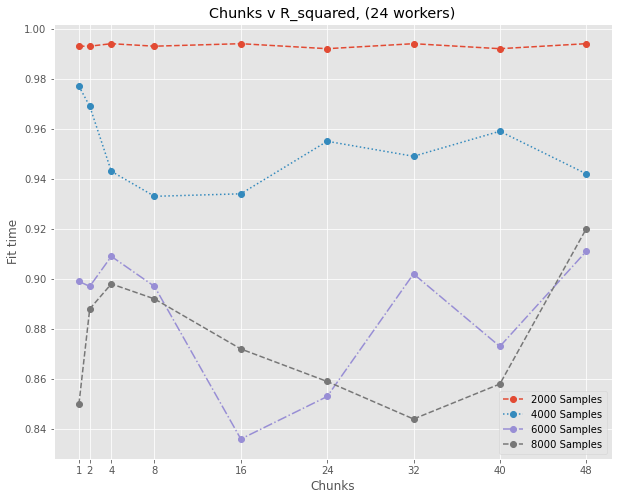

In [17]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.plot(data2000_24.index, data2000_24.iloc[:,3],'o--', label='2000 Samples')
plt.plot(data4000_24.index, data4000_24.iloc[:,3], 'o:', label='4000 Samples')
plt.plot(data6000_24.index, data6000_24.iloc[:,3], 'o-.', label='6000 Samples')
plt.plot(data8000_24.index, data8000_24.iloc[:,3], 'o--', label='8000 Samples')
plt.xticks(data2000.index)
plt.title('Chunks v R_squared, (24 workers)')
plt.xlabel('Chunks')
plt.ylabel('Fit time')
plt.legend()